# Descriptive Statistics - Distribution

**Data** are pieces of information that usually comes with high volume. It is neither efficient nor economical to demonstrate the entire dataset to your audience. Therefore, we use **descriptive statistics** to summarize and present the most relevant information.

*Descriptive analysis* is the start point of statistical analyses, it provides summary of the data set which can be *tabular*, *graphical*, or *numerical*. A good data analyst should have all of these tools in their toolkit and be able to choose the most suitable descriptive presentation according to the audience of the analysis. In this chapter, we will focus on the tabular and graphical display of descriptive statistics. We will categorize tools by the number of variables to be analyzed and their continuity.

## 1. One Categorical Variable

We begin our discussion by learning to **slice** a pandas dataframe and extract only one variable, the resulting single column belongs to the **Series** class.

Let's begin our analysis by importing the "affairs" example dataset from the wooldridge module. Descriptions of this dataset can be found [here](https://rdrr.io/cran/wooldridge/man/affairs.html).

**varaible** is also known as:
1. Feature
2. Attribute

**observation** is also known as:
1. record
2. row

Categorical variable vs Quantitative:

Frequency distribution table
Relative Frequency distribution table

Bar chart
Pie chart

In [1]:
import wooldridge as woo

# Import the affairs dataset
df = woo.data("affairs")
df.head()

,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,affair,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel
0,4,1,37.0,10.0,0,3,18,7,4,0,0,0,1,0,0,0,0,1,0
1,5,0,27.0,4.0,0,4,14,6,4,0,0,0,1,0,0,0,1,0,0
2,6,1,27.0,1.5,0,3,18,4,4,3,1,0,1,0,0,0,0,1,0
3,11,0,32.0,15.0,1,1,12,1,4,0,0,0,1,0,0,0,0,0,0
4,12,0,27.0,4.0,1,3,17,1,5,3,1,1,0,0,0,0,0,1,0


Use DataFrame.**info()** method to display the number of observations, all column name, and their datatypes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        601 non-null    int64  
 1   male      601 non-null    int64  
 2   age       601 non-null    float64
 3   yrsmarr   601 non-null    float64
 4   kids      601 non-null    int64  
 5   relig     601 non-null    int64  
 6   educ      601 non-null    int64  
 7   occup     601 non-null    int64  
 8   ratemarr  601 non-null    int64  
 9   naffairs  601 non-null    int64  
 10  affair    601 non-null    int64  
 11  vryhap    601 non-null    int64  
 12  hapavg    601 non-null    int64  
 13  avgmarr   601 non-null    int64  
 14  unhap     601 non-null    int64  
 15  vryrel    601 non-null    int64  
 16  smerel    601 non-null    int64  
 17  slghtrel  601 non-null    int64  
 18  notrel    601 non-null    int64  
dtypes: float64(2), int64(17)
memory usage: 89.3 KB


There are a total of 601 observations and 19 variables in the affairs dataset. Let's extract the kids column

In [3]:
# Extract the kids column
kids = df["kids"]

Next, we need to convert values in kids to the **category** datatype.

> The single column is stored as a **Series** class.

Next, let's convert it to a **categorical** data type, in order to use methods designed for categorical objects.

In [4]:
# Use the .astype method
kids=kids.astype("category")
kids

0      0
1      0
2      0
3      1
4      1
      ..
596    0
597    1
598    1
599    1
600    1
Name: kids, Length: 601, dtype: category
Categories (2, int64): [0, 1]

Now that we have a categorical array, we can play around with its [attributes and methods](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.categories.html)

In [5]:
print(kids.cat.categories)

Int64Index([0, 1], dtype='int64')


In [6]:
# Assign labels to each category: 0 -> "no", 1-> "yes"

"""
[0,1] are the original category names, we replace the two names with ["no", "yes"], respectively. 
Note that the order matters
"""

kids.cat.categories = ["no","yes"]
print(kids.head())

# assign the new categorical column back to the dataframe
df["kids"] = kids

0     no
1     no
2     no
3    yes
4    yes
Name: kids, dtype: category
Categories (2, object): ['no', 'yes']


In [7]:
# Or alternatively
kids.cat.rename_categories(["no","yes"])

0       no
1       no
2       no
3      yes
4      yes
      ... 
596     no
597    yes
598    yes
599    yes
600    yes
Name: kids, Length: 601, dtype: category
Categories (2, object): ['no', 'yes']

In [8]:
# Change category orders
kids.cat.reorder_categories(["yes","no"])

0       no
1       no
2       no
3      yes
4      yes
      ... 
596     no
597    yes
598    yes
599    yes
600    yes
Name: kids, Length: 601, dtype: category
Categories (2, object): ['yes', 'no']

> We can also relabel categories using logical slicing.

In [9]:
df.loc[df["male"]==1,"male"] = "yes"
df["male"]

0      yes
1        0
2      yes
3        0
4        0
      ... 
596    yes
597      0
598    yes
599    yes
600      0
Name: male, Length: 601, dtype: object

### Summary

1. Comparison operation on a pandas Series will return a column of boolean values. e.g. df["column_name"] == 1
2. df.loc[,] method can take boolean Series as a slicing reference. e.g. df.loc[df["column_name"]==1,:]
3. Replacing values in a DataFrame can be achieved through reassigning. e.g. df.loc[0,1]=1
4. Create a new column in a DataFrame can be achieved through assigning.

### Exercise
Replace zeros in the male column with "no"

### 1.1 Frequency Distribution table

The most commonly used tabular display of a discrete variable is the frequency distribution table

> A frequency distribution is a tabular summary of data showing the number (frequency) of observations in each of several *nonoverlapping* categories or classes.

Both series objects and categorical objects have the [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method that returns a frequency distribution table.

In [10]:
kids = df["kids"].astype("category")
freq = kids.value_counts(sort=False)

print("Frequency Table for kids\n")
print(freq)
print(type(freq))

Frequency Table for kids

no     171
yes    430
Name: kids, dtype: int64
<class 'pandas.core.series.Series'>


From this table, we can see that there are 430 yes observations and 171 no observations. 
> The value_counts() method returns a Series datatype. So, refer to the [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) documentation for its attributes and methods

If the **normalize** parameter is set to **True**, a relative frequency distribution table is returned. 

### 1.2 Relative Frequency Distribution table

A frequency distribution shows the number (frequency) of observations in each of several nonoverlapping categories. However, we are often interested in the proportion, or percentage, of observations in each class. 

> Relative frequency of a category = $\frac{\text{Frequency of the class}}{n}$

To generate a relative frequency table, assign True to the *normalize* parameter of the *value_counts()* method

In [11]:
df["male"]=df["male"].astype("category")
df["male"]=df["male"].cat.rename_categories(["woman","man"])
rel_freq = df["male"].value_counts(normalize=True)
rel_freq

woman    0.524126
man      0.475874
Name: male, dtype: float64

### 1.3 Bar Chart

A **bar chart** uses the height of the bars to represent frequency. To create a bar chart, we need to import the **matplotlib.pyplot** module.

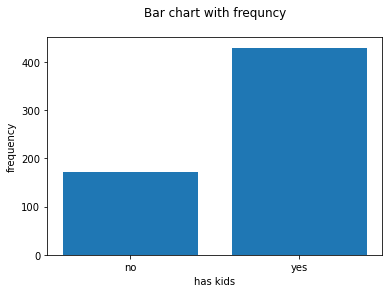

In [12]:
import matplotlib.pyplot as plt

plt.bar(x = freq.index, height=freq)
# x, height, bottom, align
# if x is an array of strings, it will be treated as categories
# if x is an array of numerical values, it will be treated as positions

plt.title("Bar chart with frequncy\n") #set title
plt.xlabel("has kids") #set x label
plt.ylabel("frequency") #set y label
# plt.savefig("bar.png")
plt.show() # print plot to the screen

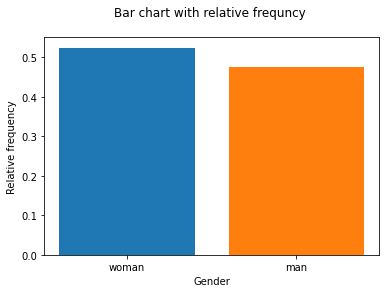

In [13]:
# relative frequency bar plot

plt.bar(x = rel_freq.index, height=rel_freq, color=["tab:blue","tab:orange"])
plt.title("Bar chart with relative frequncy \n") #set title
plt.xlabel("Gender") #set x label
plt.ylabel("Relative frequency") #set y label

plt.show()

### 1.4 Pie Chart

A **pie chart** is created from a relative/percent frequency distribution to show the proportion of each category.

> Try different colors using this [color table](https://matplotlib.org/stable/gallery/color/named_colors.html).


The **pie chart** provides another graphical display for presenting relative frequency for categorical data.

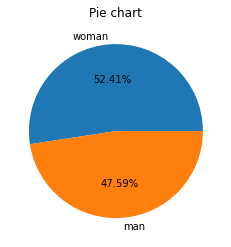

In [14]:
plt.pie(x=rel_freq,labels=rel_freq.index,autopct="%.2f%%")
plt.title("Pie chart")
plt.show()

### Exercise
download the soft_drink dataset from CourseSet 
1. create a frequency distribution table
2. draw a bar chart
3. draw a pie chart

## 2. One Continuous Variable

### 2.1 Cut to bins
When dealing with a continuous variable, we can categorize its values into several bins and then treat it as a categorical variable. For example, the age column in the affairs dataset can be treated as a continuous variable. 

By setting the **bins** parameter of the [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method, we can create equal-width bins and count the number of the observations within each bin. But an advanced way of creating categorical variables is using the [pd.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) method.

<BarContainer object of 5 artists>

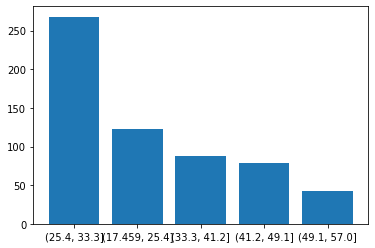

In [15]:
freq = df["age"].value_counts(bins=5)
plt.bar(x=freq.index.astype("str"), height=freq)

An advanced way of converting a quantitative variable a categorical variable to to use [pd.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).

In [16]:
# create a list of a categories (10-19,20-29,30-39,40-49,50-59)
import pandas as pd

bin_edges = [10,20,30,40,50,60] 
# both the left-most and right-most edges should be provided
# intervals = pd.IntervalIndex.from_tuples([(10,20),(20,30),(30,40),(40,50),(50,60)])
# labels = ["10 to 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60"]

# Advanced - Use list comprehensions to create a list from a list
# labels=["{} to {}".format(i, i+9) for i in [10,20,30,40,50]]


# cut the age column and export the result to a new column to the dataframe
df["age_cat"] = pd.cut(x=df["age"],bins = bin_edges)
# bins = can be a scalar, a list of bin_edges, or an IntervalIndex object
# right = True by default, left open, right closed.
# labels = a list of labels

# show results
df[["age","age_cat"]].head()

,age,age_cat
0,37.0,"(30, 40]"
1,27.0,"(20, 30]"
2,27.0,"(20, 30]"
3,32.0,"(30, 40]"
4,27.0,"(20, 30]"


(10, 20]      6
(20, 30]    270
(30, 40]    203
(40, 50]     79
(50, 60]     43
Name: age_cat, dtype: int64


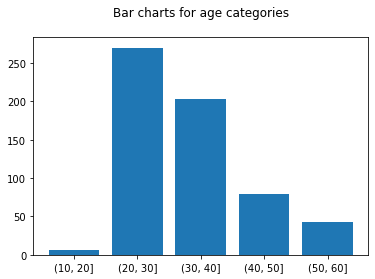

In [17]:
#  we can draw bar charts using this frequency distribution table
freq = df["age_cat"].value_counts(sort=False)
print(freq)
plt.bar(x=freq.index.astype("str"), height=freq)

plt.title("Bar charts for age categories\n")
plt.show()

### Histogram

A common graphical display of continuous data is a **histogram**. A histogram is constructed by placing the variable of interest on the horizontal axis and the frequency, relative frequency, or density on the vertical axis.

We can plot our first histogram and take a look at the distribution of the age variable.

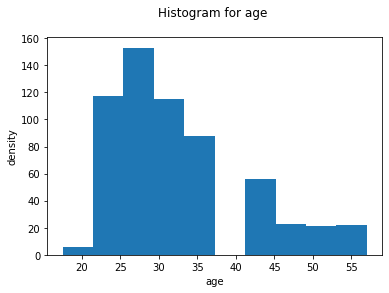

In [18]:
plt.hist(x=df["age"])
#nbins = 10 by default
#range = a tuple or None
#density = False by default

plt.title("Histogram for age \n")
plt.xlabel("age")
plt.ylabel("density")
plt.show()


One of the most important usage of a histogram is to provide information about the shape, or form, of a distribution. From the above age histogram, we see that the age distribution is right-skewed, with the most observations between 35.40 and 29.35 years old. No observations are found in [37.25, 41.20).

## 3. Two Categorical Variables

Thus far in this chapter, we have focused on using tabular and graphical displays to summarize the data for a single categorical or quantitative variable. Often a manager or decision maker needs to summarize the data for two variables in order to reveal the **relationship** - if any - between the variables.

### Crosstabulation

A **crosstabulation** is a tabular summary of data for two variables. it provides the bivariate distribution, where the frequency or relative frequency of each possible combined outcome is demonstrated. 

As an example, let's explore the bivariate distribution of two categorical variables - whether has kid and the rate of marital happiness - in the affairs dataset. Again, We begin our analysis by converting the ratemarr variable to categorical and assign proper labels according to [this documentation](https://rdrr.io/cran/wooldridge/man/affairs.html).

In [19]:
# convert the rate of marital happiness column to categorical
df["ratemarr"] = df["ratemarr"].astype("category")

# check the category names and their order
print(df["ratemarr"].cat.categories) ##

# rename categories
df["ratemarr"].cat.categories = ["vry unhap", "smewht unhap", "avg", "hap than avg", "vry hap marr"]

Int64Index([1, 2, 3, 4, 5], dtype='int64')


---

We can use the .crosstab() **class method** to crosstabulate the *kids* and the *ratemarr* variables. Read how to configure pd.crosstab() [here](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

> A class method is a method which is bound to the class and not the object of the class.

In [20]:
# crosstabulation with frequency

print("Crosstabulation of marital happiness and whether has kids")
crosstab = pd.crosstab(index = df["kids"], columns = df["ratemarr"],margins=True, normalize="index")
# margins       bool, default False
# margins_name
# normalize     bool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
# don't forget you can ignore the parameter names as long as they are in the right position
crosstab

Crosstabulation of marital happiness and whether has kids


ratemarr,vry unhap,smewht unhap,avg,hap than avg,vry hap marr
kids,,,,,
no,0.017544,0.046784,0.140351,0.233918,0.561404
yes,0.030233,0.134884,0.160465,0.358140,0.316279
All,0.026622,0.109817,0.154742,0.322795,0.386023


In reviewing the table above, we see that the greatest number of people in the sample have a happy than average marriage and have kids. Only 3 people find their marriage very unhappy and don't have any kids. Similar interpretations of the other frequencies can be made. In addition, note that the right and bottom margins of the crosstabulation provide the frequency distributions for *kids* and *ratemarr* separately.

We can also calculate the relative frequencies of each combination with respect to the row or column margins.

In [21]:
# crosstabulation with row percentage

print("Crosstabulation with row percentage")
pd.crosstab(index = df["kids"], columns = df["ratemarr"], normalize = "index")
#margins = True
# normalize = "index" or "column" or "all"

Crosstabulation with row percentage


ratemarr,vry unhap,smewht unhap,avg,hap than avg,vry hap marr
kids,,,,,
no,0.017544,0.046784,0.140351,0.233918,0.561404
yes,0.030233,0.134884,0.160465,0.358140,0.316279


In [22]:
# Too messy? Let's change the display settings
pd.options.display.float_format = '{:.2f}'.format

# crosstabulation with column percentage
print("Crosstabulation with row percentage")
pd.crosstab(index = df["kids"], columns = df["ratemarr"], normalize = "index")

Crosstabulation with row percentage


ratemarr,vry unhap,smewht unhap,avg,hap than avg,vry hap marr
kids,,,,,
no,0.02,0.05,0.14,0.23,0.56
yes,0.03,0.13,0.16,0.36,0.32


In [23]:
# crosstabulation with total percentage - probability distribution

print("Probability distribution")
pd.crosstab(index = df["kids"], columns = df["ratemarr"], margins = True, normalize = "all")

Probability distribution


ratemarr,vry unhap,smewht unhap,avg,hap than avg,vry hap marr,All
kids,,,,,,
no,0.00,0.01,0.04,0.07,0.16,0.28
yes,0.02,0.10,0.11,0.26,0.23,0.72
All,0.03,0.11,0.15,0.32,0.39,1.00


### Side-by-Side and Stacked Bar Charts

Side-by-side bar charts and stacked bar charts are extensions of basic bar charts that are used to display the joint distribution of two variables.

> A **side-by-side bar chart** is a graphical display for depicting multiple bar charts on the same display. 

> A **stacked bar chart** is a bar chart in which each bar is broken into rectangular segments of a different color showing the relative frequency of each class in a manner similar to a pie chart.

To draw a side-by-side or a stacked bar chart, we can use the *matplotlib.pyplot* module.

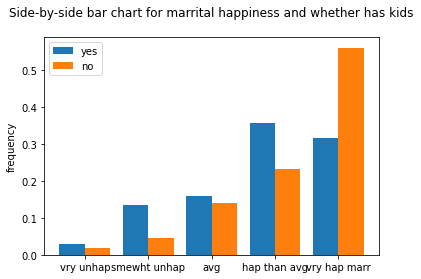

In [24]:
# side-by-side bar chart

# add left bars first and move bars to the left

bin_width = 0.8
x_pos_left = [i-bin_width/2 for i in range(0,10,2)]
x_pos_right = [i+bin_width/2 for i in range(0,10,2)]

plt.bar(x = x_pos_left, height = crosstab.loc["yes",], label = "yes")
# width: float or array-like, default: 0.8

# # add right bars first and move bars to the right
plt.bar(x = x_pos_right, height = crosstab.loc["no",], label = "no")

plt.ylabel("frequency")

# add xticks and xlabels
plt.xticks(ticks = range(0,10,2), labels = df["ratemarr"].cat.categories)
plt.legend()
plt.title("Side-by-side bar chart for marrital happiness and whether has kids\n")

plt.show()

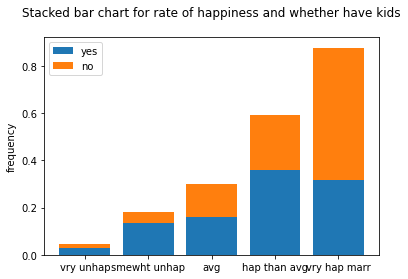

In [25]:
# stacked bar plot

plt.bar(x = df["ratemarr"].cat.categories, height = crosstab.loc["yes","vry unhap":"vry hap marr"], label = "yes")
# kids=no are added on top of kids=yes
plt.bar(x = df["ratemarr"].cat.categories, height = crosstab.loc["no","vry unhap":"vry hap marr"], bottom = crosstab.loc["yes","vry unhap":"vry hap marr"], label = "no")

plt.ylabel("frequency")
plt.legend()
plt.title("Stacked bar chart for rate of happiness and whether have kids\n")

plt.show()

### Seaborn - An even better visualization module

[*Seaborn*](https://seaborn.pydata.org/api.html) is a python module built on matplotlib. It provides simplified and prettified visualization APIs. We can use the sns.countplot() method to draw a side-by-side bar plot with only one line of code.

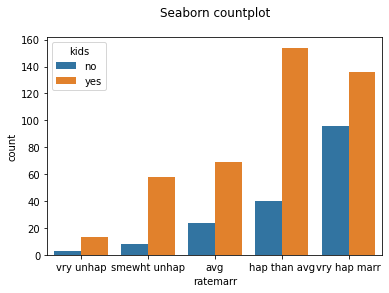

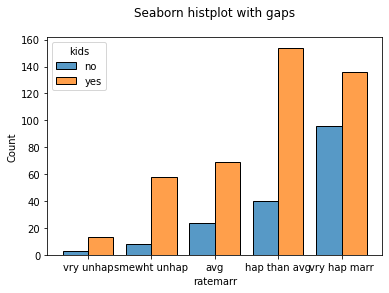

In [26]:
import seaborn as sns

sns.countplot(x="ratemarr", hue="kids", data = df)
plt.title("Seaborn countplot\n" )
plt.show()

# OR use histplot
sns.histplot(data = df, x="ratemarr", hue="kids", multiple = "dodge", shrink=0.8)

# hue: group by
# multiple: style to display multiple hues - {“layer”, “dodge”, “stack”, “fill”}
# use shrink= to show gaps

plt.title("Seaborn histplot with gaps\n" )
plt.show()

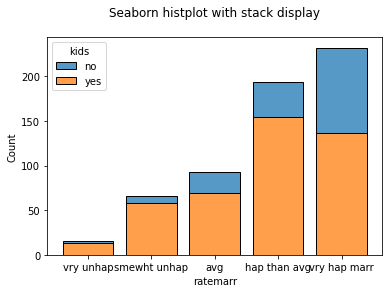

In [27]:
# Stacked bar plot
sns.histplot(data = df, x = "ratemarr", hue="kids", multiple = "stack", shrink=0.8)
plt.title("Seaborn histplot with stack display\n" )
plt.show()

## 4. Two Continuous Variables

Next, we are back to the continuous case again. It is always possible to convert a continuous variable to categorical first and apply methods introduced in the previous section. So here, I am going to skip this convert-and-conquer method and add two more useful tools to your analytical toolbox.

### Joint plot

The first graphical display generate from the histogram. In a traditional histogram, we use the height of the bar to represent the frequency, relative frequency, or density of a range of value. However, when it comes to two variables, the "height" of a two-dimensional value combination would probe into the 3rd dimension. Of course, we can draw a three-dimensional histogram in this situation, but a better practice is to use the darkness of color to represent such heights.

For example, we would like to analyze the joint distribution of *wage* and *years of education* in the *wage1* dataset. Both variables are continuous, so we use the *.histplot()* method from the seaborn (alias sns) module.

In [28]:
df2 = woo.data("wage1")
df2.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.13,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.18,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.10,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.79,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.67,49,4


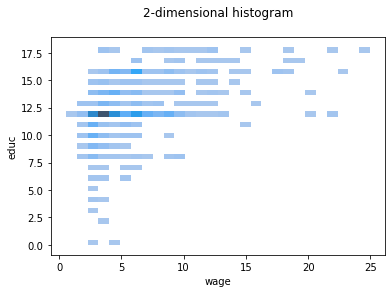

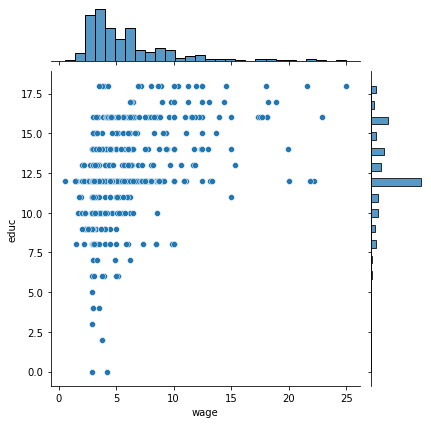

In [29]:
sns.histplot(x="wage",y="educ",data=df2,)
plt.title("2-dimensional histogram\n" )
plt.show()

sns.jointplot(x="wage",y="educ",data=df2)
plt.show()

We distinguish a two-dimensional histogram from the one-dimensional vanilla case by adding a *y* parameter. The **jointplot()** method provides two separate histograms on the top and the right margins and a scatter plot in its main frame.

### Scatter plot

A **scatter plot** is a graphical display of the relationship between two quantitative (continuous) variables, and a **trendline** is a line that provides an approximation of the relationship. Each point in the scatter plot represent an observation (row) in the dataset.

Let's depict a scatter plot for *wage* and *years of education*.

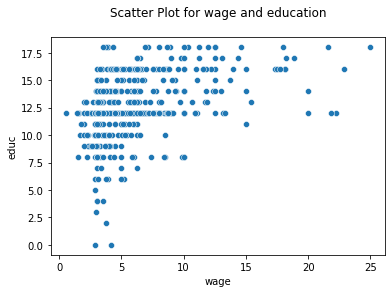

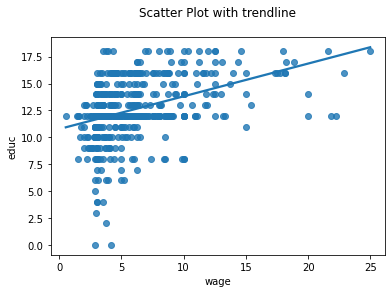

In [30]:
# Scatterplot
sns.scatterplot(x= "wage", y="educ",data=df2)

plt.title("Scatter Plot for wage and education\n")
plt.show()

# Scatterplot with trendline
sns.regplot(x= "wage", y="educ",data=df2, ci=None)
plt.title("Scatter Plot with trendline\n")
plt.show()

The scatter diagram in Figure 3.13 and Figure 3.14 indicates a positive relationship between years of education and the happiness of marriage. 

See also [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [plt.hist2d()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html) for similar figures.

> To combine the two plots in one figure, use [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

### Some matplotlib terminologies:

The **Figure** is the final image that may contain 1 or more Axes.

The **Axes** represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

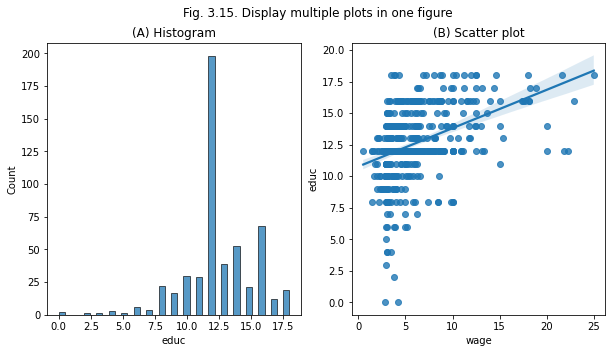

In [31]:
# subplots method returns two objects
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

# plot the first subfigure on ax1
sns.histplot(x= "educ",data=df2, ax=axs[0])
axs[0].set_title("(A) Histogram")

# plot the second subfigure on ax2
sns.regplot(x= "wage", y="educ",data=df2, ax=axs[1])
axs[1].set_title("(B) Scatter plot")

# Add a title
plt.suptitle("Fig. 3.15. Display multiple plots in one figure\n")
plt.show()

## Extra: Kernel Density Function

Kernel density function is invented to "smoothly" display the distribution of a variable. Although histogram is intuitive and easy to calculate, it has lots of bumps. To smooth it out, let's first explore the functional form of a histogram.

$$\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^n \mathbb{1}\{(x_i-x)<\frac{h}{2}\}$$

At each midpoint of the bin, we count (i.e. assign 1 to) the observations that are close enough to the midpoint. Then we divide the frequency by n to obtain *relative frequency*, and then further divide it by h to get *density*, such that the "area under curve" is equal to 1 and it can be viewed as a "probability density function".

Take a closer look at $\hat{f}(x)$ and you'll find out that the non-smoothness is caused by the $\mathbb{1}\{.\}$ part of the formula. Can we switch to a smoother function?

Of course! Indeed, we can replace the $\mathbb{1}\{.\}$ part with any function (denoted by K(.)) that satisfies the following criteria.

1. K(.) is non-negative - so that we'll never end up with negative probability
2. $\int \hat{f}(x) dx = 1$ - so that it is a pdf
3. K(u)=K(-u) - so that the average of the corresponding distribution is equal to that of the sample used.


[Examples](https://en.wikipedia.org/wiki/Kernel_(statistics)) of K(.).

The new generalized formula is then:

$$\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^n K(\frac{(x_i-x)}{h})$$

Where $\hat{f}(x)$ is called the **kernel density estimator**, K(.) the **kernel**, and h the **bandwidth**.

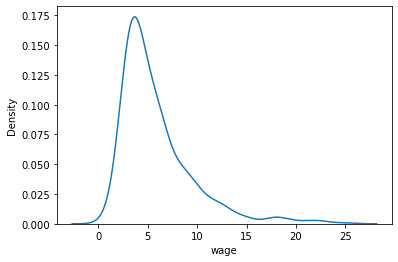

In [32]:
sns.kdeplot(x="wage",data=df2)
plt.show()

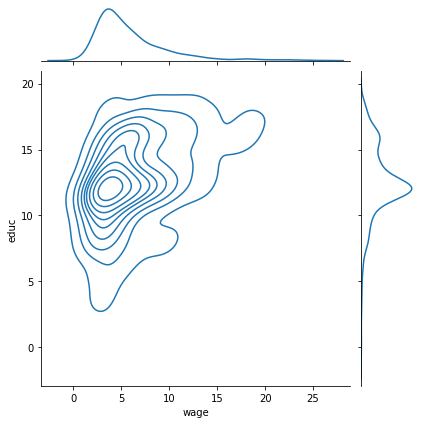

In [33]:
sns.jointplot(x="wage",y="educ", kind="kde", data=df2)
plt.show()

## 5. Data Visualization - Best Practices

- Give the display a clear and concise title.
- Keep the display simple. Do not use three dimensions when two dimensions are sufficient
- Clearly label each axis and provide the units of measure.
- If color is used to distinguish categories, make sure the colors are distinct.
- If multiple colors or line types are used, use a legend to define how they are used and place the legend close to the representation of the data